#  Tree Ensembles - Random forest

In [99]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

# 2018-2019 Test Dataset

In [7]:
df = pd.read_csv('2018-2019_Model_Ready.csv', index_col=0)
df.head(3).append(df.tail(3))

,Game_Result,Team1_OFFRTG,Team1_DEFRTG,Team1_AST/TO,Team1_REB_P,Team1_FG_P,Team1_FGA,Team1_PACE,Team1_3PA,Team1_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_AST/TO,Team2_REB_P,Team2_FG_P,Team2_FGA,Team2_PACE,Team2_3PA,Team2_3P_P
0,1,106.3,107.5,1.83,51.1,43.5,93.1,104.39,35.9,33.8,100.8,96.2,1.66,50.6,41.8,89.3,101.50,33.6,32.8
1,1,102.4,105.0,1.30,50.8,42.8,93.8,106.08,29.7,27.5,120.3,107.5,2.00,51.1,52.4,89.1,104.00,31.9,41.8
2,0,113.2,98.2,1.57,53.4,48.0,91.4,106.00,40.6,38.4,114.9,109.1,2.09,49.2,46.3,91.0,100.44,34.5,37.7
1275,1,120.4,113.0,1.65,53.9,50.1,90.2,98.75,29.8,38.5,110.0,108.1,2.25,48.2,46.2,89.5,98.42,30.2,33.7
1276,1,111.5,105.4,2.36,48.3,46.3,90.2,100.80,33.2,36.1,113.0,110.9,1.86,50.7,47.4,93.2,109.70,37.8,33.3
1277,1,126.0,103.9,2.65,49.0,48.2,94.2,102.10,53.6,41.4,113.7,103.7,2.02,49.4,50.6,92.5,103.42,35.7,41.1


In [8]:
df.shape

(1190, 19)

In [9]:
df.describe()

,Game_Result,Team1_OFFRTG,Team1_DEFRTG,Team1_AST/TO,Team1_REB_P,Team1_FG_P,Team1_FGA,Team1_PACE,Team1_3PA,Team1_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_AST/TO,Team2_REB_P,Team2_FG_P,Team2_FGA,Team2_PACE,Team2_3PA,Team2_3P_P
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.00000,1190.000000
mean,0.596639,109.815126,109.752605,1.782294,50.001345,46.092101,89.255294,100.591008,32.272941,35.466975,109.840000,109.534034,1.783227,50.066723,46.036218,89.393866,100.618723,32.38000,35.512941
std,0.490778,4.631327,4.230216,0.287058,2.089647,2.005859,3.119768,2.736351,4.900041,2.632720,4.546513,4.195836,0.279797,2.074435,2.034172,3.183965,2.675570,4.92936,2.682316
min,0.000000,97.500000,96.200000,1.210000,43.300000,41.000000,80.100000,94.720000,21.400000,27.500000,97.500000,96.200000,1.210000,43.300000,41.000000,80.100000,94.720000,21.40000,27.500000
25%,0.000000,106.700000,106.925000,1.570000,48.700000,44.700000,87.300000,98.732500,28.700000,33.800000,106.800000,106.900000,1.570000,48.900000,44.600000,87.300000,98.790000,28.92500,33.800000
50%,1.000000,110.000000,109.700000,1.780000,50.000000,46.000000,89.500000,100.570000,32.400000,35.400000,110.100000,109.600000,1.780000,50.100000,46.000000,89.500000,100.560000,32.40000,35.500000
75%,1.000000,112.900000,112.375000,1.960000,51.400000,47.200000,91.200000,102.430000,34.875000,36.800000,112.900000,112.100000,1.960000,51.400000,47.300000,91.300000,102.310000,34.90000,37.000000
max,1.000000,126.000000,122.700000,2.650000,56.500000,52.400000,98.500000,109.700000,53.600000,43.500000,126.000000,122.700000,2.650000,56.500000,52.400000,98.500000,109.700000,53.60000,43.500000


## Features, Labels, Training, and Test Data Creation

In [11]:
# Target Variable:
df.Game_Result.value_counts()

1    710
0    480
Name: Game_Result, dtype: int64

In [12]:
# Create features (X) and labels (y)
y = df['Game_Result']
X = df.drop(['Game_Result'], axis=1)

In [13]:
# Perform the split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25, random_state=42)

## Build a regular tree as baseline

In [16]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

I'll run a quick examination to verify how important each feature ended up being in the decision tree model. For this purpose I will be using the "feature_importances_" attribute of the trained model:

In [17]:
tree_clf.feature_importances_

array([0.08751106, 0.06292478, 0.0639038 , 0.02480466, 0.01081449,
       0.        , 0.01716586, 0.03557328, 0.06796085, 0.34881945,
       0.11959319, 0.        , 0.0591897 , 0.0264955 , 0.02354733,
       0.        , 0.        , 0.05169606])

As expected this matrix is quite hard to interpret so I will transfer this into a plot and see the feature importance results:

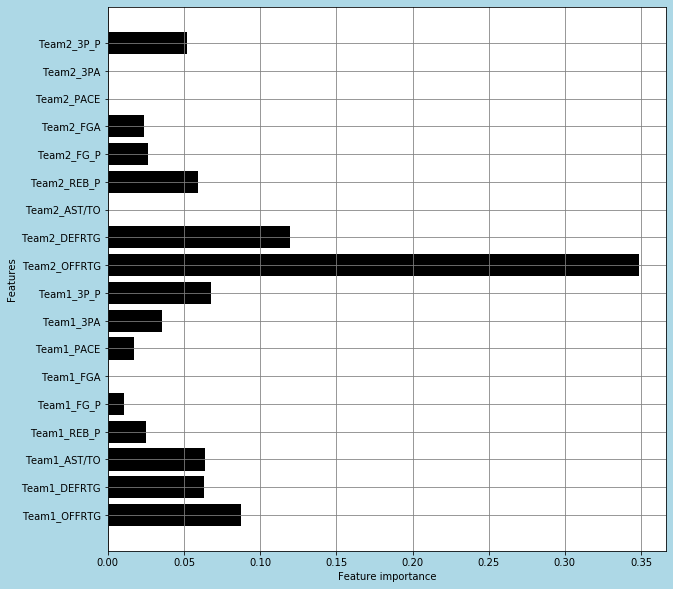

In [84]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10, 10))
    plt.barh(range(n_features), model.feature_importances_, color='k', align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.rcParams["figure.facecolor"] = "lightblue"
    plt.grid(True)
plot_feature_importances(tree_clf)

<b>OBSERVATIONS:</b>

First lets remember that our target is the Game_Result which is aimed at the Home Team winning or losing the game with 1 assigned to winning and a 0 to losing. 

Team1 refers to the visiting team and Team2 to the home team. We already saw during the Data cleaning and conditioning that the Home Team (Team2) wins in 59% of the games. 

Now to the observations:

* The Most importance feature is the Home Team (Team2) Offensive Rating (Teeam2_OFFRTG). This is not a surprisse in today's game as with the the evolution of the NBA, teams are trying to outpase good defenses with tremendous offensive efforts such as the one done by Golden State in recent years and the Houston Rockets

* The second most important feature is the defensive rating of the home team (Team2_DEFRT). Again, this is no surprise. The only surprise is that the difference between offense and defense. 

* The third most important feature if the visiting team offensive rating (Team1_OFFRTG), not a surprise again as this must be related to the Team2 defensive efforts and it will result in a win or loss.

* 3 Point shooting plays a key role as well. This is related to the Offensive Rating. The more 3-pointers are made the highest your offensive rating should bee as it will also weaken your interior defense, and ultimately result in a better offense.

## Model Performance

In [85]:
# Test set predictions
pred = tree_clf.predict(X_test)

In [107]:
# confusion matrix and classfication report
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,178,184,362
1,125,405,530
All,303,589,892


In [111]:
print('Classficiation Report')
print('---------------------')
print(classification_report(y_test, pred))

Classficiation Report
---------------------
              precision    recall  f1-score   support

           0       0.59      0.49      0.54       362
           1       0.69      0.76      0.72       530

    accuracy                           0.65       892
   macro avg       0.64      0.63      0.63       892
weighted avg       0.65      0.65      0.65       892



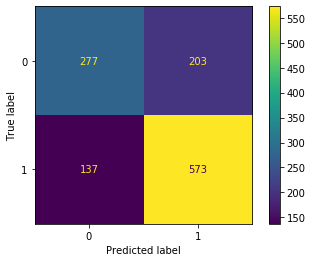

In [115]:
# Alternative confusion matrix
plot_confusion_matrix(tree_clf, X, y, values_format='.3g')
plt.show()

<b>I DON'T UNDERSTAND THIS ALTERNATIVE CONFUSION MATRIX, DISCUSS WITH ABHINEET<b>

In [116]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 65.36%


This is not bad but it is certainly not great at 65.36%. Hopefully with the Random Forest this will improve...lets keep on going with the ensemble

## Bagged trees

What I will do here is try as the first ensemble is a bag of trees hoping that the model's accuracy will improve. 

In [120]:
# We start by instantiating the BaggingClassifire
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [121]:
# Now to fitting the training data:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [124]:
# I'm going to call the .score() to obtain the accuracy score on the training dataset and then on the test data:
bagged_tree.score(X_train, y_train)

0.9228187919463087

In [125]:
bagged_tree.score(X_test, y_test)

0.6659192825112108

Not a great improvement to be honest. 1% is merely nothing, so I'll keep on going testing other ensemble methods. The next one that I will test will be a Random Forest

## Random Forest

In [127]:
# I'll start by instantiating the RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [128]:
# Now to check the accuracy score
forest.score(X_train, y_train)

0.9228187919463087

In [129]:
# And for the test set:
forest.score(X_test, y_test)

0.6569506726457399

Once again not a great improvement...

Lets look at the <b>FEATURE IMPORTANCE</b>

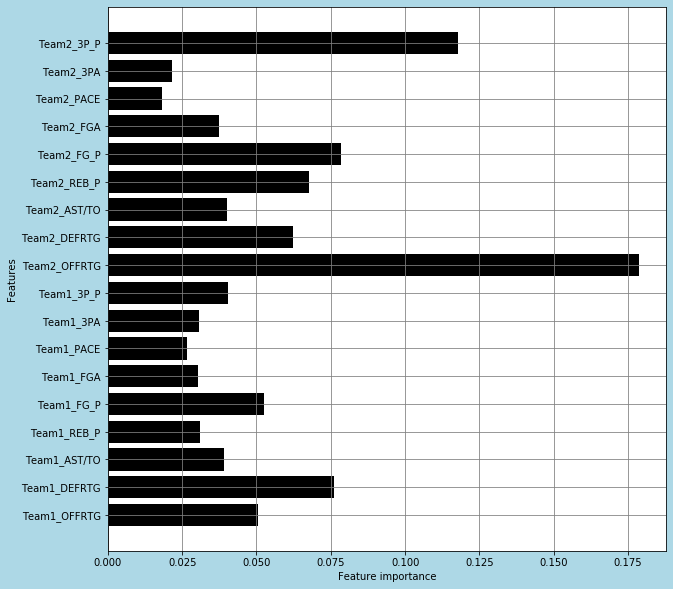

In [131]:
plot_feature_importances(forest)
plt.rcParams["figure.facecolor"] = "lightblue"

OBSERVATIONS...

## Looking at the trees inside the forest

In [132]:
# Instantiate and fit a RandomForestClassifier
forest_2 = RandomForestClassifier(n_estimators=5, max_features=10, max_depth= 2)
forest_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features=10, n_estimators=5)

In [134]:
# First tree from forest_2
rf_tree_1 = forest_2.estimators_[0]

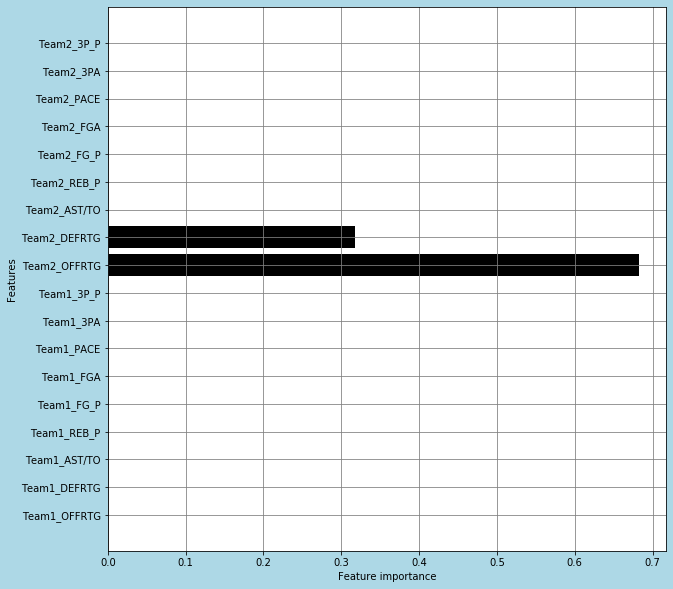

In [135]:
#I'll have a look at the tree's feature importance using the "plot_feature_importances()" function:
plot_feature_importances(rf_tree_1)

Lets look at tree number 3...

In [143]:
# Second tree from forest_2
rf_tree_2 = forest_2.estimators_[1]

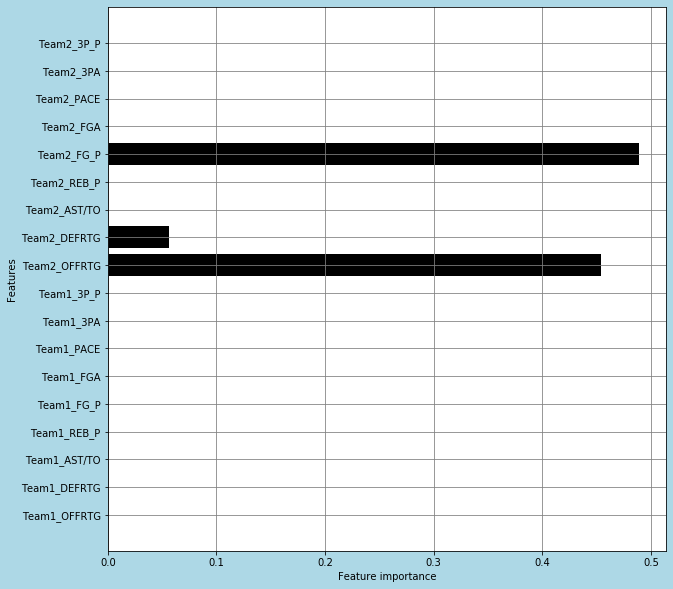

In [144]:
# Feature importance plot
plot_feature_importances(rf_tree_2)

In [145]:
# Third tree from forest_2
rf_tree_3 = forest_2.estimators_[2]

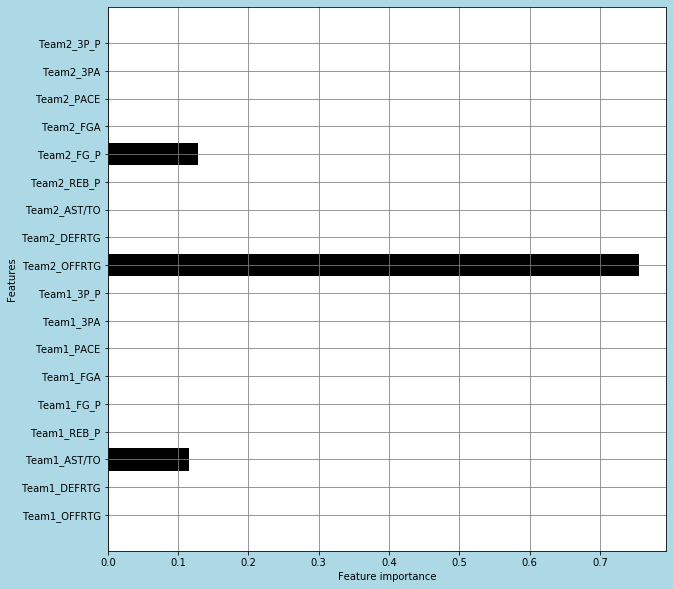

In [146]:
# Feature importance plot for tree number 3
plot_feature_importances(rf_tree_3)

## Model Test I

The next DataFrame has been already been cleaned and conditioned for modeling, therefore all I need to do is use Pandas to read_csv and start applying algorithms. 

In [294]:
df_SAS = pd.read_csv('df_SAS_1S.csv', index_col=0)
df_SAS.head(2)

,Game_Result,Team1_OFFRTG,Team1_DEFRTG,Team1_AST/TO,Team1_REB_P,Team1_FG_P,Team1_FGA,Team1_PACE,Team1_3PA,Team1_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_AST/TO,Team2_REB_P,Team2_FG_P,Team2_FGA,Team2_PACE,Team2_3PA,Team2_3P_P
9,1,111.4,114.2,1.64,48.7,44.8,92.4,103.94,28.9,38.1,111.9,110.6,2.02,50.8,46.6,91.7,99.33,22.3,39.1
57,0,112.1,105.5,1.67,49.2,50.6,86.0,97.13,22.3,41.6,111.9,110.6,2.02,50.8,46.6,91.7,99.33,22.3,39.1


The Target as per the rest of the models is the Game_Result, so I will have a quick look at it's values:

In [295]:
# Target Variable:
df_SAS.Game_Result.value_counts()

1    33
0     9
Name: Game_Result, dtype: int64

42 games in Total, so half a season that normally corresponds to games played at Home. 

I will start with the workflow by first defining my target (y) and features(X), spliting the data with a test_size equal to 0.25 and a random_state of 42, and then a quick fit to the train data with a maximum depth of 5. This will correspond to the baseline model

In [297]:
# Create features (X) and labels (y)
y = df_SAS['Game_Result']
X = df_SAS.drop(['Game_Result'], axis=1)

# Perform the split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the model with the Train data - Creating baseline
tree1a_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree1a_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

I will now have a quick look at the feature importances by value and then will visualize the plot as it might more illustrative than a bunch of numbers

In [299]:
tree1a_clf.feature_importances_

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

Not much to see due to the size of this sample as well, so I'm not expecting great results here

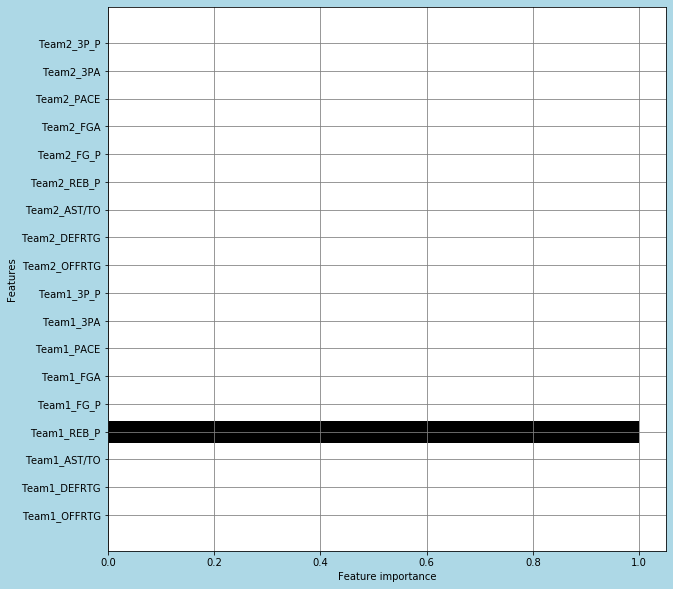

In [300]:
plot_feature_importances(tree1a_clf)

Probably due to the size of the sample we are getting this feature importance response where most if not all is given to the Rebounding percentage of the Home Team, which is not normal and not expected

I'm going to run predictions, look into a confusion matrix and the classification report for the accuracy and other stats

In [303]:
# Test set predictions
pred = tree1a_clf.predict(X_test)

In [304]:
# confusion matrix and classfication report
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,1,7,8
1,3,20,23
All,4,27,31


In [305]:
print('Classficiation Report')
print('---------------------')
print(classification_report(y_test, pred))

Classficiation Report
---------------------
              precision    recall  f1-score   support

           0       0.25      0.12      0.17         8
           1       0.74      0.87      0.80        23

    accuracy                           0.68        31
   macro avg       0.50      0.50      0.48        31
weighted avg       0.61      0.68      0.64        31



In [306]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 67.74%


This accuracy is more than 10% below the True/Ground Truth, therefore not a great result. LEt's hope that with some of thee Ensemble techniques it will improve

### Bagged Trees

In [307]:
# We start by instantiating the BaggingClassifier
bagged_tree1a =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [308]:
# Now to fitting the training data:
bagged_tree1a.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [309]:
# I'm going to call the .score() to obtain the accuracy score on the training dataset and then on the test data:
display(bagged_tree1a.score(X_train, y_train))

# And for the test set:
display(bagged_tree1a.score(X_test, y_test))

1.0

0.7741935483870968

With the Bagged Trees there was a significant improvement in the accuracy to 77.42%. This doesn't surprise me though as the Train data is 25% of the entire dataset which is 42 samples, so not veery hard to predict this results, specially when the Home Team wins at such a high rate

### Random Forest

In [310]:
# I'll start by instantiating the RandomForestClassifier
forest1a = RandomForestClassifier(n_estimators=100, max_depth=5)
forest1a.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [311]:
# Now to check the accuracy score
display(forest1a.score(X_train, y_train))

# And for the test set:
display(forest1a.score(X_test, y_test))

1.0

0.7419354838709677

The model's accuracy decrease by 3%, still it is quite a good value very close to the ground truth. One last thing to see is the feature importance in a plot to understand the weight distribution and what is being considered as more/less important

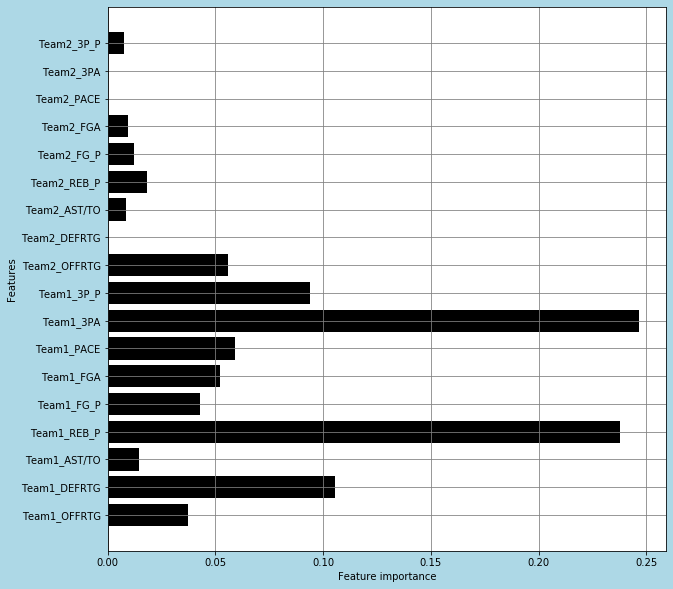

In [313]:
plot_feature_importances(forest1a)
plt.rcParams["figure.facecolor"] = "lightblue"

Three point attempts (3PA), Rebounding Percentage (REB_P) and thee Defensive Rating (DEFRTG) for Home Team (Team1) are the most important features. It's interest how shooting more three pointers and a stronger defense can translate into wins, but then that is what defines today's game. We can look at the Golden State Warrior as an example. They have won 3 championships in thee past 5 years and they had three of the best three pointer in basketball today as starters (Kevin Durant, Klay Thompson and Steve Curry), plus the other two players could also shoot the 3. Their defense was very tough with the only weak link being the Point Guard position held by Steve Curry, however with his long shooting range he managed to compensate.

## Model Test II

Now that we have run these algorithms on a Tier 1 team, lets continue doing the same task of studying the Miami Heat as a Tier 2 Team. I won't go into much detail as for the previous test as all the steps have already been explained, so I will go faster right to the results

In [314]:
df_MIA = pd.read_csv('df_MIA_1S.csv', index_col=0)
df_MIA.head(2)

,Game_Result,Team1_OFFRTG,Team1_DEFRTG,Team1_AST/TO,Team1_REB_P,Team1_FG_P,Team1_FGA,Team1_PACE,Team1_3PA,Team1_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_AST/TO,Team2_REB_P,Team2_FG_P,Team2_FGA,Team2_PACE,Team2_3PA,Team2_3P_P
30,0,114.9,109.1,2.09,49.2,46.3,91.0,100.44,34.5,37.7,108.9,107.6,1.37,53.6,43.6,91.4,102.71,33.9,35.4
53,1,105.2,109.8,1.39,51.0,43.1,91.8,100.56,30.8,36.2,108.9,107.6,1.37,53.6,43.6,91.4,102.71,33.9,35.4


In [316]:
df_MIA.Game_Result.value_counts()

0    21
1    19
Name: Game_Result, dtype: int64

In [319]:
# Create features (X) and labels (y)
y = df_MIA['Game_Result']
X = df_MIA.drop(['Game_Result'], axis=1)

# Perform the split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the model with the Train data - Creating baseline
tree1b_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree1b_clf.fit(X_train, y_train)

# Test set predictions
pred = tree1b_clf.predict(X_test)

# confusion matrix and classfication report
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

print('Classficiation Report')
print('---------------------')
print(classification_report(y_test, pred))

print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))


Confusion Matrix
----------------
Classficiation Report
---------------------
              precision    recall  f1-score   support

           0       0.50      0.35      0.41        17
           1       0.39      0.54      0.45        13

    accuracy                           0.43        30
   macro avg       0.44      0.45      0.43        30
weighted avg       0.45      0.43      0.43        30

Testing Accuracy for Decision Tree Classifier: 43.33%


This is a terrible accuracy, even worse than flipping a coin. The Miami Heat wins just above 50% of their Home Games, so I wasn't expecting a massive accuracy but 43.33 is quite low to bee honest. Lets see how the Ensembles can help

### Bagged Trees

In [323]:
# We start by instantiating the BaggingClassifier
bagged_tree1b = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [324]:
# Now to fitting the training data:
bagged_tree1b.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [325]:
# I'm going to call the .score() to obtain the accuracy score on the training dataset and then on the test data:
display(bagged_tree1b.score(X_train, y_train))

# And for the test set:
display(bagged_tree1a.score(X_test, y_test))

1.0

0.43333333333333335

No improvement whatsoever!

### Random Forest

In [326]:
# I'll start by instantiating the RandomForestClassifier
forest1b = RandomForestClassifier(n_estimators=100, max_depth=5)
forest1b.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [327]:
# Now to check the accuracy score
display(forest1b.score(X_train, y_train))

# And for the test set:
display(forest1b.score(X_test, y_test))

1.0

0.5333333333333333

The Random Forest Ensemble game thee best result with an increase of 10% in the accuracy to end up with 53.33%. This is most probably over-fitted as it is over-estimating the Miami Heat winning Home games. Definitely not a great team to bet on.

# 2010 - 2020 Dataset

As on the previous Notebooks I will proceed to load both, the 2010-2020 and the 2000-2010 datasets, and then I'll manipulate them when the time comes per section of the Notebook

In [147]:
df1 = pd.read_csv('2010-2020_Model_Ready.csv', index_col=0)
print("df1:")
display(df1.head(3))
df2 = pd.read_csv('2000-2010_Model_Ready.csv', index_col=0)
print("=============================================================================")
print("df2:")
display(df2.head(3))

df1:


,Game_Result,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
0,1,96.0,46.5,43.2,38.0,112.2,114.2,46.9,1.89,106.09,86.8,46.3,36.8,38.0,107.5,99.1,51.1,1.26,104.23
1,1,87.5,45.7,29.0,33.6,107.9,96.8,51.4,1.54,101.00,84.0,49.6,29.5,36.7,112.9,107.5,49.6,1.35,101.50
2,1,94.0,41.1,36.2,29.3,103.7,109.6,45.2,1.81,101.80,86.0,46.3,35.8,41.9,104.9,114.2,47.3,1.30,103.00


df2:


,Game_Result,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
0,0,62.0,56.5,9.0,55.6,114.0,89.1,56.6,0.94,92.5,81.0,37.0,15.0,40.0,89.1,114.0,43.4,1.08,92.5
1,0,78.0,41.0,7.0,28.6,87.8,83.7,52.3,0.84,98.0,85.0,36.5,10.0,30.0,83.7,87.8,47.7,1.60,98.0
2,1,72.0,45.8,7.0,57.1,87.8,99.0,53.3,0.74,98.0,79.0,43.0,16.0,37.5,99.0,87.8,46.7,1.33,98.0


In [149]:
df1.shape

(12198, 19)

In [150]:
df1.isna().sum()

Game_Result     0
Team1_FGA       0
Team1_FG_P      0
Team1_3PA       0
Team1_3P_P      0
Team1_OFFRTG    0
Team1_DEFRTG    0
Team1_REB_P     0
Team1_AST/TO    0
Team1_PACE      0
Team2_FGA       0
Team2_FG_P      0
Team2_3PA       0
Team2_3P_P      0
Team2_OFFRTG    0
Team2_DEFRTG    0
Team2_REB_P     0
Team2_AST/TO    0
Team2_PACE      0
dtype: int64

I ran a couple of quick tests, to check the shape and the possible presence of missing values, both ended up negative, so thats positive, and that means that the data as expected is ready for Modeling, so nothing to do but start testing the algorithm

## Feature, Labels, and Data Training

In [151]:
# Target Variable
df1.Game_Result.value_counts()

1    7160
0    5038
Name: Game_Result, dtype: int64

A Total of 12198 Games played with an true winning percentage of 58.9%. Keep in mind once again, that these is for all teams, therefore we will be testing this algorithm, as we have done with the others on a couple of teams, and for consistencies, wee will keep those 2 teams as the same.

In [152]:
# Create features (X) and labels (y)
y = df1['Game_Result']
X = df1.drop(['Game_Result'], axis=1)

# Perform the split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25, random_state=42)

## Build a regular tree as baseline

In [154]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [155]:
tree_clf.feature_importances_

array([0.        , 0.02603623, 0.        , 0.00230936, 0.20681214,
       0.22382833, 0.        , 0.01833119, 0.        , 0.        ,
       0.04761862, 0.01454178, 0.01552343, 0.18476647, 0.26023244,
       0.        , 0.        , 0.        ])

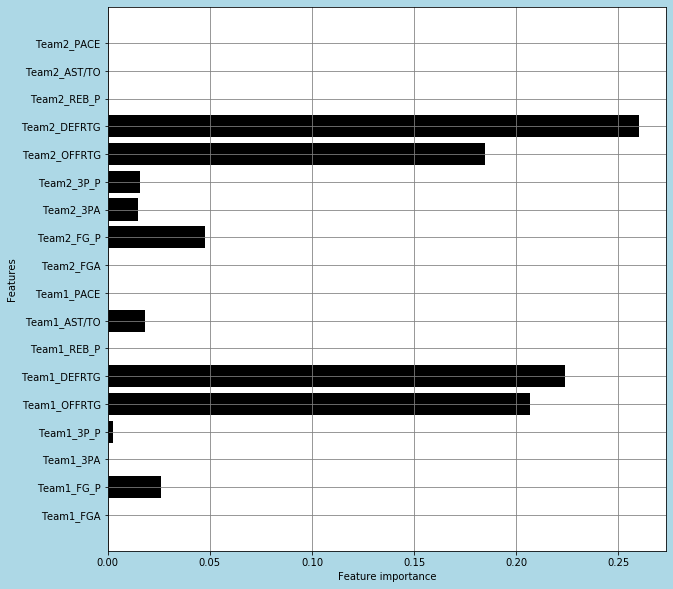

In [156]:
plot_feature_importances(tree_clf)

## Model Performance

In [157]:
# Test set predictions
pred = tree_clf.predict(X_test)

In [158]:
# confusion matrix and classfication report
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,1655,2128,3783
1,843,4522,5365
All,2498,6650,9148


In [159]:
print('Classficiation Report')
print('---------------------')
print(classification_report(y_test, pred))

Classficiation Report
---------------------
              precision    recall  f1-score   support

           0       0.66      0.44      0.53      3783
           1       0.68      0.84      0.75      5365

    accuracy                           0.68      9148
   macro avg       0.67      0.64      0.64      9148
weighted avg       0.67      0.68      0.66      9148



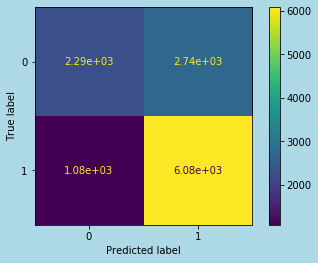

In [160]:
# Alternative confusion matrix
plot_confusion_matrix(tree_clf, X, y, values_format='.3g')
plt.show()

In [161]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 67.52%


Let's go now with the ensembles to see if this accuracy can be improved:

## Bagged trees

In [162]:
# We start by instantiating the BaggingClassifire
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [163]:
# Now to fitting the training data:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [234]:
# I'm going to call the .score() to obtain the accuracy score on the training dataset and then on the test data:
display(bagged_tree.score(X_train, y_train))

display(bagged_tree.score(X_test, y_test))

0.735096497498213

0.6924469859423398

The <b>Bagged Tree Ensemble</b> algorithm has improved the accuracy up to 70.92%, which is quite good compared to the reality. 

## Random Forest

In [168]:
# I'll start by instantiating the RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [238]:
# Now to check the accuracy score
display(forest.score(X_train, y_train))

# And for the test set:
display(forest.score(X_test, y_test))

0.7070764832022873

0.6994996426018585

Not much difference between the Bagged Trees and the Random Forest. 
lets have a look at the Feature importance

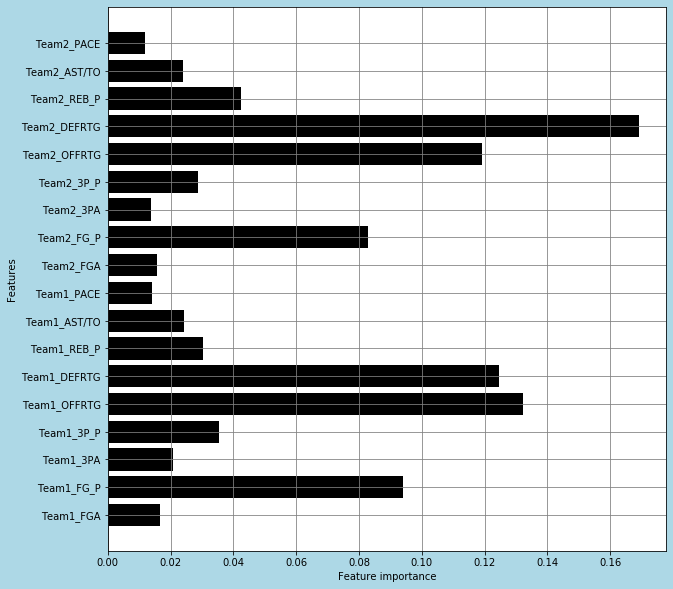

In [171]:
plot_feature_importances(forest)
plt.rcParams["figure.facecolor"] = "lightblue"

Wow! this is very interesting for those who really like basketball stats. Team2 is the visiting team, so this plot is telling us that during the past 10 years, the most important factors affecting the Home Team winning are the visiting team's defense (DEFRTG) and offense (OFFRTG). I guess it makes sense when you think about it. Following these two come the same for the Home Team.

It will be interesting to compare these Feature Importance with the ones from the previous 10 years, and also with the last 20 years all together. 

During the 2018-2019 season it was clear that the Home Team's Offensive Rating (OFFRTG) was the most important feature.

Let's see how these algorithm performs when we look at the same two individual teams that we have been looking at for a while now: 

## Model Test I

In [176]:
df_SAS_2 = pd.read_csv('SAS_2010-2020.csv', index_col=0)
df_SAS_2.head(2)

,Game_Result,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
9,1,86.0,42.3,28.4,35.2,99.8,107.9,51.6,1.02,100.80,89.0,47.5,23.0,33.7,108.6,106.2,52.8,1.36,104.75
32,1,94.0,47.9,38.0,38.2,113.6,113.6,49.3,1.69,104.88,89.0,47.5,23.0,33.7,108.6,106.2,52.8,1.36,104.75


In [178]:
# Target Variable:
df_SAS_2.Game_Result.value_counts()

1    334
0     81
Name: Game_Result, dtype: int64

As we know from thee previous algorithms, the San Antonio Spurs have won 80.48 of their home games, so this is our Ground True

In [179]:
# Create features (X) and labels (y)
y = df_SAS_2['Game_Result']
X = df_SAS_2.drop(['Game_Result'], axis=1)

In [180]:
# Perform the split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25, random_state=42)

In [181]:
tree2_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree2_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [182]:
tree2_clf.feature_importances_

array([0.        , 0.08943525, 0.        , 0.        , 0.25632517,
       0.07884904, 0.        , 0.        , 0.17107848, 0.08200641,
       0.        , 0.2209107 , 0.        , 0.05758994, 0.        ,
       0.        , 0.        , 0.04380502])

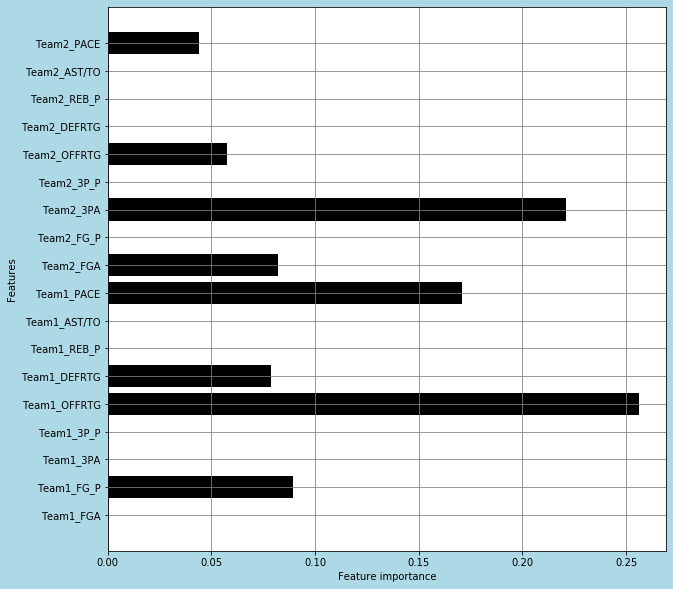

In [254]:
plot_feature_importances(tree2_clf)

In [185]:
# Test set predictions
pred = tree2_clf.predict(X_test)

In [186]:
# confusion matrix and classfication report
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,13,43,56
1,43,212,255
All,56,255,311


In [187]:
print('Classficiation Report')
print('---------------------')
print(classification_report(y_test, pred))

Classficiation Report
---------------------
              precision    recall  f1-score   support

           0       0.23      0.23      0.23        56
           1       0.83      0.83      0.83       255

    accuracy                           0.72       311
   macro avg       0.53      0.53      0.53       311
weighted avg       0.72      0.72      0.72       311



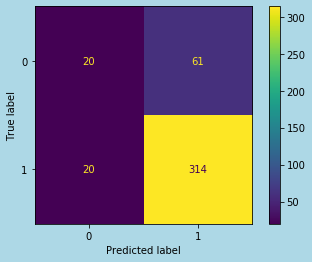

In [188]:
# Alternative confusion matrix
plot_confusion_matrix(tree_clf, X, y, values_format='.3g')
plt.show()

In [189]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 72.35%


### Bagged Trees

In [191]:
# We start by instantiating the BaggingClassifire
bagged_tree2 = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [192]:
# Now to fitting the training data:
bagged_tree2.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [265]:
# I'm going to call the .score() to obtain the accuracy score on the training dataset and then on the test data:
display(bagged_tree2.score(X_train, y_train))

# And for the test set:
display(bagged_tree2.score(X_test, y_test))

0.773109243697479

0.7440225035161744

This is a great score considering that the Ground True is 81%. Being 4% under the reality is quite a good results. Still lets look at the Random Forest and maybe that will improve even more

### Random Forest

In [196]:
# I'll start by instantiating the RandomForestClassifier
forest2 = RandomForestClassifier(n_estimators=100, max_depth=5)
forest2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [270]:
# Now to check the accuracy score
display(forest2.score(X_train, y_train))

# And for the test set:
display(forest2.score(X_test, y_test))

0.8151260504201681

0.7946554149085795

Great performance from this algorithm!!!

At 78.46% accuracy, the results are very close to reality at 81%.

One last thing to do is to look at the FEATURE IMPORTANCE to compare it with the rest of the datasets:

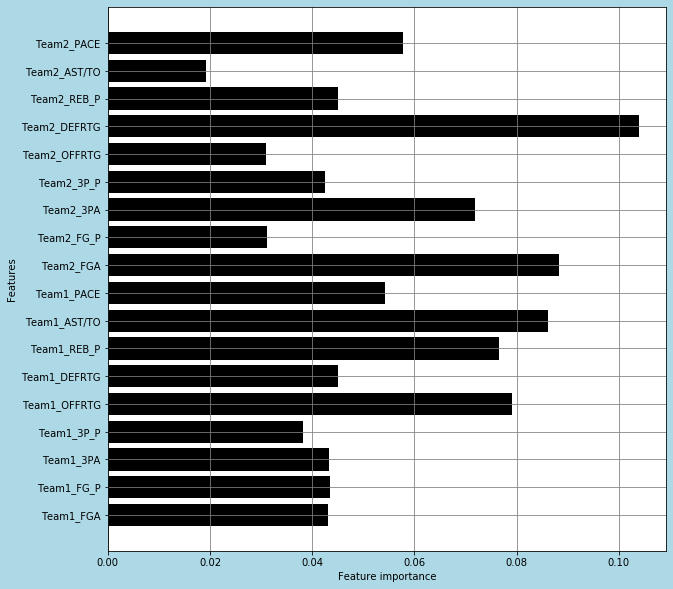

In [199]:
plot_feature_importances(forest2)
plt.rcParams["figure.facecolor"] = "lightblue"

Interesting again how thee Defensive Rating of the visiting (Team2) team has the most importance determining if the Home team (Team1) wins or losses. 

Clearly all of these 9 statistics for each team are the most important ones, and ask the NBA Analysts have mentioned, they reflect as wins 

Field Goal Attempts (FGA) by the visiting team is quite important. This is clear and obvious as well as in average. the more thye shoot the higher chances of scoring they will have and the higher chances of winning they will have. 

One more interesting feature is the AST/TO ratio. Again the more assist per turnover that teams have, the better chances of winning.

Let's see now our second team, the Miami Heat

## Model Test II

In [177]:
df_MIA_2 = pd.read_csv('MIA_2010-2020.csv', index_col=0)
df_MIA_2.head(2)

,Game_Result,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
6,1,95.3,41.5,32.0,28.1,95.7,108.1,48.4,1.32,108.91,85.6,47.0,33.2,39.2,106.6,99.3,52.5,1.19,106.09
51,1,85.0,45.6,32.2,29.2,102.0,103.4,49.6,1.36,101.20,85.6,47.0,33.2,39.2,106.6,99.3,52.5,1.19,106.09


In [201]:
# Target Variable:
df_MIA_2.Game_Result.value_counts()

1    281
0    128
Name: Game_Result, dtype: int64

The Miami Heat team has won 68.70% of their home games during the past 10 years. This represent out Ground Truth

In [202]:
# Create features (X) and labels (y)
y = df_MIA_2['Game_Result']
X = df_MIA_2.drop(['Game_Result'], axis=1)

# Perform the split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25, random_state=42)

<b>Building a Regular tree as baseline</b>

In [203]:
tree3_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree3_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [204]:
tree3_clf.feature_importances_

array([0.05077686, 0.        , 0.        , 0.25565733, 0.10286446,
       0.        , 0.21636422, 0.        , 0.        , 0.08766239,
       0.03200943, 0.        , 0.        , 0.15302101, 0.        ,
       0.1016443 , 0.        , 0.        ])

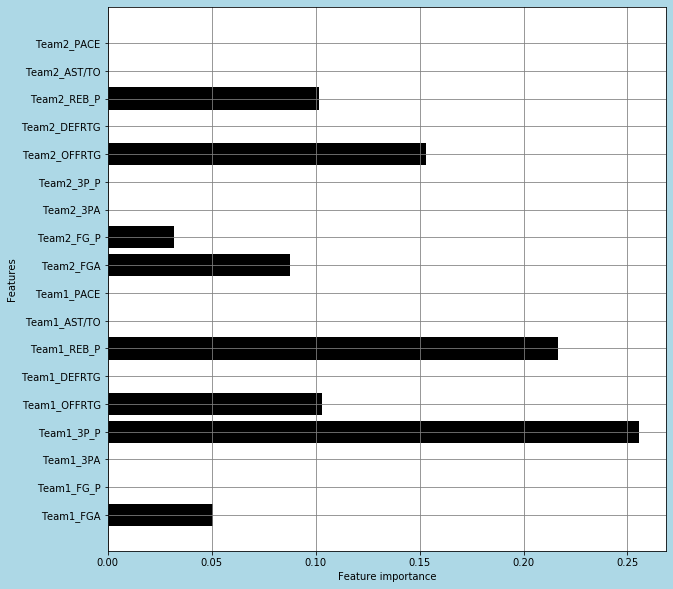

In [205]:
plot_feature_importances(tree3_clf)

For the Baseline Model the 3-point shooting percentage of the Home team (Team1) is the most important feature, followed by the Rebounding Percentage (REBRTG).

<b>Model Performance</b>

In [206]:
# Test set predictions
pred = tree3_clf.predict(X_test)

In [207]:
# confusion matrix and classfication report
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,35,63,98
1,58,150,208
All,93,213,306


In [208]:
print('Classficiation Report')
print('---------------------')
print(classification_report(y_test, pred))

Classficiation Report
---------------------
              precision    recall  f1-score   support

           0       0.38      0.36      0.37        98
           1       0.70      0.72      0.71       208

    accuracy                           0.60       306
   macro avg       0.54      0.54      0.54       306
weighted avg       0.60      0.60      0.60       306



In [210]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 60.46%


<b>The baseline Tree has an accuracy of 60.46% compared to the 68.7% Ground truth</b>

### Bagged Trees

In [211]:
# We start by instantiating the BaggingClassifire
bagged_tree3 =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [212]:
# Now to fitting the training data:
bagged_tree3.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [214]:
# I'm going to call the .score() to obtain the accuracy score on the training dataset and then on the test data:
bagged_tree3.score(X_train, y_train)

0.9902912621359223

In [216]:
bagged_tree3.score(X_test, y_test)

0.6633986928104575

Accuracy with the Bagged Trees has increased 6% to now be 66.34%. Quite a good improvement and just 2% under the ground truth!

### Random Forest

In [217]:
# I'll start by instantiating the RandomForestClassifier
forest3 = RandomForestClassifier(n_estimators=100, max_depth=5)
forest3.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [218]:
# Now to check the accuracy score
forest3.score(X_train, y_train)

0.9902912621359223

In [219]:
# And for the test set:
forest3.score(X_test, y_test)

0.6601307189542484

A slight decrease from the Bagged trees but nothing significant really. 

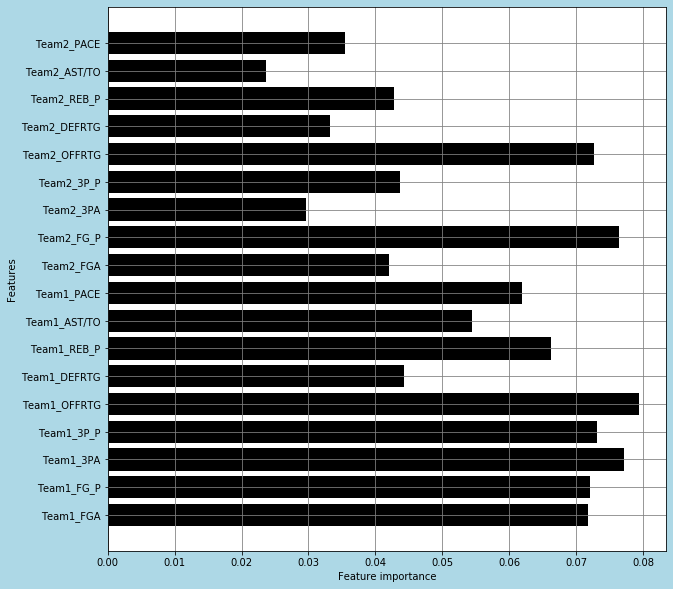

In [242]:
plot_feature_importances(forest3)
plt.rcParams["figure.facecolor"] = "lightblue"

As with the previous models, the Defensive rating keeps on playing quite a key role!

# 2000 - 2020 Dataset

In [222]:
df_all = pd.read_csv('2000-2020_Model_Ready', index_col=0)
df_all.head(2)

,Game_Result,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
0,1,96.0,46.5,43.2,38.0,112.2,114.2,46.9,1.89,106.09,86.8,46.3,36.8,38.0,107.5,99.1,51.1,1.26,104.23
1,1,87.5,45.7,29.0,33.6,107.9,96.8,51.4,1.54,101.00,84.0,49.6,29.5,36.7,112.9,107.5,49.6,1.35,101.50


## Feature, Labels, and Data Training

In [223]:
# Target Variable
df_all.Game_Result.value_counts()

1    16673
0    11307
Name: Game_Result, dtype: int64

During the past 20 years/seasons a total of 27980 games have been played, out of which almost 60% have been won by the Home Team (Team1). Lets check how the ensemble algorithms respond to this, and if they can actually predict properly these results

In [224]:
# Create features (X) and labels (y)
y = df_all['Game_Result']
X = df_all.drop(['Game_Result'], axis=1)

# Perform the split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25, random_state=42)

## Build a regular tree as baseline

In [225]:
tree4_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree4_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [226]:
tree4_clf.feature_importances_

array([0.        , 0.0363785 , 0.        , 0.        , 0.17700227,
       0.1957144 , 0.        , 0.00271819, 0.        , 0.        ,
       0.01451023, 0.        , 0.00735254, 0.23889287, 0.31928375,
       0.        , 0.        , 0.00814726])

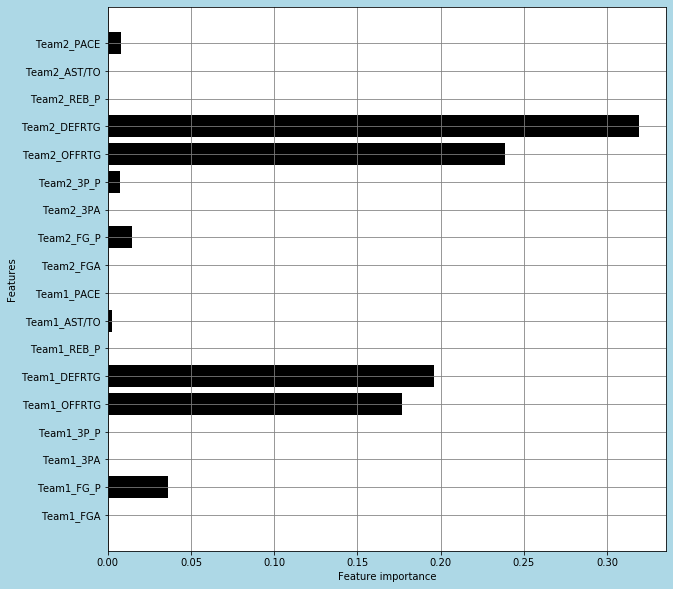

In [227]:
plot_feature_importances(tree4_clf)

## Model Performance

In [228]:
# Test set predictions
pred = tree4_clf.predict(X_test)

In [229]:
# confusion matrix and classfication report
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,4464,4032,8496
1,2852,9637,12489
All,7316,13669,20985


In [230]:
print('Classficiation Report')
print('---------------------')
print(classification_report(y_test, pred))

Classficiation Report
---------------------
              precision    recall  f1-score   support

           0       0.61      0.53      0.56      8496
           1       0.71      0.77      0.74     12489

    accuracy                           0.67     20985
   macro avg       0.66      0.65      0.65     20985
weighted avg       0.67      0.67      0.67     20985



In [231]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 67.2%


## Bagged Trees

In [232]:
# We start by instantiating the BaggingClassifire
bagged_tree4 =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [235]:
# Now to fitting the training data:
bagged_tree4.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [236]:
# I'm going to call the .score() to obtain the accuracy score on the training dataset and then on the test data:
display(bagged_tree4.score(X_train, y_train))

display(bagged_tree4.score(X_test, y_test))

0.7325232308791995

0.6920181081725042

## Random Forest

In [237]:
# I'll start by instantiating the RandomForestClassifier
forest4 = RandomForestClassifier(n_estimators=100, max_depth=5)
forest4.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [240]:
# Now to check the accuracy score
display(forest4.score(X_train, y_train))

# And for the test set:
display(forest4.score(X_test, y_test))

0.731951393852752

0.6940195377650703

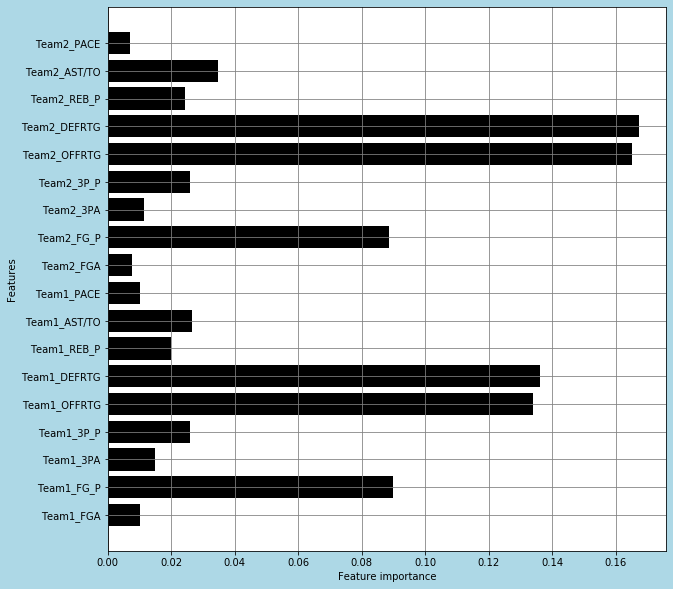

In [241]:
plot_feature_importances(forest4)
plt.rcParams["figure.facecolor"] = "lightblue"

## Model Test I

In [243]:
df_SAS_3 = pd.read_csv('df_SAS_2.csv', index_col=0)
df_SAS_3.head(2)

,Game_Result,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
9,1,86.0,42.3,28.4,35.2,99.8,107.9,51.6,1.02,100.80,89.0,47.5,23.0,33.7,108.6,106.2,52.8,1.36,104.75
32,1,94.0,47.9,38.0,38.2,113.6,113.6,49.3,1.69,104.88,89.0,47.5,23.0,33.7,108.6,106.2,52.8,1.36,104.75


In [244]:
df_SAS_3.shape

(949, 19)

In [245]:
df_SAS_3.isna().sum().sum()

0

In [249]:
# Target Variable:
df_SAS_3.Game_Result.value_counts()

1    749
0    200
Name: Game_Result, dtype: int64

During the past 20 years/seasons, the San Antonio Spurs have been quite a dominant team by winning 78.93% of their home games. This is quite remarkable and probably one of the highest winning teams of the last 20 years.

In [250]:
# Create features (X) and labels (y)
y = df_SAS_3['Game_Result']
X = df_SAS_3.drop(['Game_Result'], axis=1)

In [251]:
# Perform the split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25, random_state=42)

In [252]:
tree5_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree5_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [253]:
tree5_clf.feature_importances_

array([0.        , 0.15794076, 0.        , 0.        , 0.0955665 ,
       0.19001234, 0.02908506, 0.1888159 , 0.        , 0.15839916,
       0.10981476, 0.        , 0.        , 0.07036551, 0.        ,
       0.        , 0.        , 0.        ])

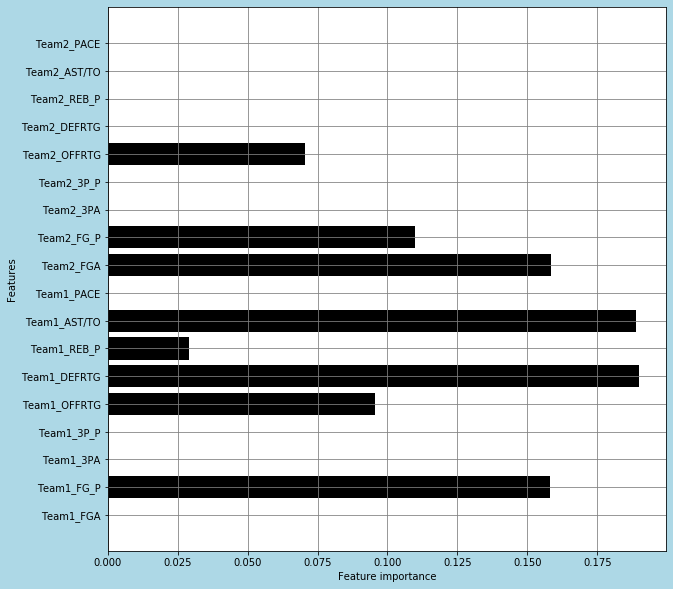

In [255]:
plot_feature_importances(tree5_clf)

In [256]:
# Test set predictions
pred = tree5_clf.predict(X_test)

In [257]:
# confusion matrix and classfication report
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,30,123,153
1,70,488,558
All,100,611,711


In [285]:
print('Classification Report')
print('---------------------')
print(classification_report(y_test, pred))

Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.55      0.53      0.54       282
           1       0.70      0.71      0.70       426

    accuracy                           0.64       708
   macro avg       0.62      0.62      0.62       708
weighted avg       0.64      0.64      0.64       708



In [259]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 72.86%


### Bagged Trees

In [288]:
# I'll start by instantiating the BaggingClassifire
bagged_tree5 =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [261]:
# Now to fitting the training data:
bagged_tree5.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [268]:
# I'm going to call the .score() to obtain the accuracy score on the training dataset and then on the test data:
display(bagged_tree5.score(X_train, y_train))

display(bagged_tree5.score(X_test, y_test))

0.9159663865546218

0.7637130801687764

### Random Forest

In [272]:
# I'll start by instantiating the RandomForestClassifier
forest5 = RandomForestClassifier(n_estimators=100, max_depth=5)
forest5.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [273]:
# Now to check the accuracy score
display(forest5.score(X_train, y_train))

# And for the test set:
display(forest5.score(X_test, y_test))

0.8823529411764706

0.7876230661040787

This model has performed extremely well, which even when it is not bad it is concerning as it is very close to the real values. Maybe a second look at it is worth it to double check that I didn't make a mistake as this is quite a repetitive process and hence easy to make a mistake with one of the names.

## Model Test II

In [275]:
df_MIA_3 = pd.read_csv('df_MIA_2.csv', index_col=0)
df_MIA_3.head(2)

,Game_Result,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
6,1,95.3,41.5,32.0,28.1,95.7,108.1,48.4,1.32,108.91,85.6,47.0,33.2,39.2,106.6,99.3,52.5,1.19,106.09
51,1,85.0,45.6,32.2,29.2,102.0,103.4,49.6,1.36,101.20,85.6,47.0,33.2,39.2,106.6,99.3,52.5,1.19,106.09


In [276]:
df_MIA_3.shape

(944, 19)

In [277]:
df_MIA_3.isna().sum().sum()

0

In [278]:
# Create features (X) and labels (y)
y = df_MIA_3['Game_Result']
X = df_MIA_3.drop(['Game_Result'], axis=1)

# Perform the split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25, random_state=42)

tree6_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree6_clf.fit(X_train, y_train)

display(tree5_clf.feature_importances_)

array([0.        , 0.15794076, 0.        , 0.        , 0.0955665 ,
       0.19001234, 0.02908506, 0.1888159 , 0.        , 0.15839916,
       0.10981476, 0.        , 0.        , 0.07036551, 0.        ,
       0.        , 0.        , 0.        ])

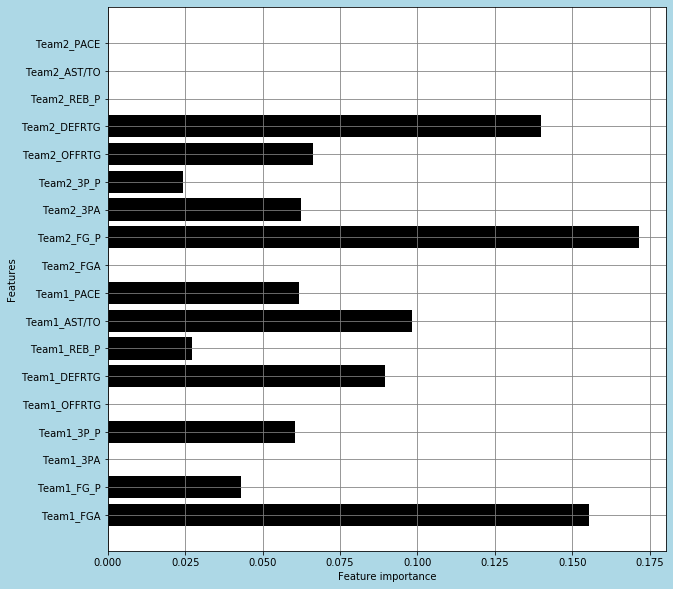

In [279]:
plot_feature_importances(tree6_clf)

In [280]:
# Test set predictions
pred = tree6_clf.predict(X_test)

In [281]:
# confusion matrix and classfication report
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,150,132,282
1,123,303,426
All,273,435,708


In [284]:
print('Classification Report')
print('---------------------')
print(classification_report(y_test, pred))

Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.55      0.53      0.54       282
           1       0.70      0.71      0.70       426

    accuracy                           0.64       708
   macro avg       0.62      0.62      0.62       708
weighted avg       0.64      0.64      0.64       708



In [286]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 63.98%


### Bagged Trees

In [287]:
# We start by instantiating the BaggingClassifire
bagged_tree6 =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [289]:
# Now to fitting the training data:
bagged_tree6.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [290]:
# I'm going to call the .score() to obtain the accuracy score on the training dataset and then on the test data:
display(bagged_tree6.score(X_train, y_train))

display(bagged_tree6.score(X_test, y_test))

0.9576271186440678

0.7062146892655368

With an accuracy of 70.62% the model is off by 10%. What is happening is that is over-estimating the home wins, so it doesn't seem very fit for bets, or at least not with this data/model 

### Random Forest

In [291]:
# I'll start by instantiating the RandomForestClassifier
forest6 = RandomForestClassifier(n_estimators=100, max_depth=5)
forest6.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [293]:
# Now to check the accuracy score
display(forest6.score(X_train, y_train))

# And for the test set:
display(forest6.score(X_test, y_test))

0.9110169491525424

0.7048022598870056

# 2000 - 2010 Dataset - Game Evolution

## Feature, Labels, and Data Training

# Summary/Observations